In [82]:
pip install pandas jieba nltk snownlp scikit-learn matplotlib wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 834.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 2.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import jieba
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from snownlp import SnowNLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba.analyse as analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [146]:
# 資料讀取
df = pd.read_csv("/Users/isc_admin/Desktop/網頁爬蟲/20231129_nissan_web_crawler.csv")
df

,i,date,title,link,author,content,comment
0,1,Tue Nov 28 09:51:02 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1701136264.A.E47....,ihl123456 (雨風評),\n原文網址: Nissan「全新電動休旅」準備導入台灣！續航力最高610km\n\nETt...,中國折價後是16萬人民幣\n外型絕對是電車T1等級，只是價格…除非裕隆國產，不然這台完全打不...
1,1,Fri Nov 24 21:23:17 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1700832199.A.506....,s888516888 (況天笑),代詢問\n\n車輛廠牌/年份/型號：NISSAN/2023/SENTRA尊爵智駕\n\n車輛...,好久沒看到仙草的單了 刀工不甚精細的感覺 多問問吧\n車版問就是盤 再問就是刀工不精細 你還...
2,1,Tue Nov 7 16:45:02 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1699346704.A.19F....,giveme520 (),去美國的時候朋友剛好想要換車\n\n用lease的方式 先繳4000後每月499簽3年XD\...,他\n遲早被Mazda取代\nMazda? 要確定欸\n這台好像蠻香的 馬自達？ 坐垃圾電車...
3,1,Fri Nov 3 11:11:15 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698981078.A.EBE....,yamatobar (747-8I),\n原文連結：\n\nhttps://autos.udn.com/autos/story/7...,老頭樂\n去日本有開過就市區買菜車\n太貴了吧 查一下武陵弘光賣多少leaf 賣六十萬 應該...
4,1,Sat Oct 28 12:17:34 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698466656.A.BAD....,f023221 (kinglan),分享個人對於日產在台灣的用車感想\n\nhttps://i.imgur.com/dTPEQ5...,日產CVT真的很可笑\n你會被你桑業務肉搜 www\n同級距賣的比牛頭貴 銷量低迷不意外吧\...
5,1,Fri Oct 27 14:35:02 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698388504.A.40F....,WangW (廢文Wang),如題\n去年買了Almera 開了一年多\n沒出什麼大毛病（不知道會不會就此立Flag)\n...,泰國哪裡不塞車那你平常開郊區還是市區多\n郊區啊!\n還行吧，CP值略高一點，外觀也不比較年...
6,1,Fri Oct 27 14:00:19 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698386424.A.210....,hanasiro (Denon),\n前陣子的出的概念車\n\nNissan caravan MyRoom 商旅露營車\n\n...,反觀中華\n越看只會越心酸\n內裝真是莊嚴\n可惜豐田的GRANVIA沒有賣這種的\n128...
7,1,Fri Oct 27 13:40:29 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698385231.A.FCD....,fakeMaskRide (FMR),https://youtu.be/oXVNNZATVDk?si=2EcfltqfTNMrAM...,人家高合都上市了 日本還在概念車\n那車頭LOGO是GTR嗎\n最好玩的日本武士遊戲對馬戰鬼...
8,1,Fri Oct 27 08:26:40 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698366402.A.8FE....,asd63312337 (幸運草),改款「新Nissan Sentra」台灣現身！有望導入省油新動力叫戰Altis\nhttps...,完全不給牛頭活路欸，最近太秀了吧\n日產在台灣打不過牛頭啦...\n這台沒epower賣不動...
9,1,Tue Oct 24 03:49:52 2023,[新聞] 比亞迪在日本賣不好？他們更愛這款50萬級距的Nissan Sakura,https://www.ptt.cc/bbs/car/M.1698090594.A.0DE....,JG8861 ((冷氣終於來裝了)),※ 引述《JG8861 ((冷氣終於來裝了))》之銘言：\n: 若是出小一點的車型(cc)，...,這個是tiida油電車嗎？\n這篇有30個字嗎？\n這種等級價位的油電日本真的超多\nNOT...


In [226]:
resub_content=[]
for i in df['content']:
    http = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    clean_text = re.sub(http, '', i)
    clean_text = re.sub(r'<.*?>', '', clean_text)
    clean_text = re.sub(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '', clean_text)
    clean_text = re.sub(r'\n', '', clean_text)
    clean_text = re.sub(r' ', '', clean_text)
    resub_content.append(clean_text)

resub_comment=[]
for i in df['comment']:
    http = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    clean_text = re.sub(http, '', i)
    clean_text = re.sub(r'<.*?>', '', clean_text)
    clean_text = re.sub(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '', clean_text)
    clean_text = re.sub(r'\n', '', clean_text)
    clean_text = re.sub(r' ', '', clean_text)
    resub_comment.append(clean_text)
resub_content
resub_comment

['中國折價後是16萬人民幣外型絕對是電車T1等級只是價格除非裕隆國產不然這台完全打不贏Y價格太死150早點睡比較快這台價格直接對標modelY沒賣比較貴已經是裕隆佛心了樓上跟我一樣看法幹嘛不掛I還比較符合他的價格停車場一堆電車會火災的邏輯你家一堆中國製的電器產品都沒事了根本杞人憂天這台的問題是價格不是性能外觀內裝也很受外國人喜愛希望61kwh的能在150左右打得贏我大n7嗎絕對是198裕隆可是吃肉長大的這台在國外比ModelY貴如果掛Infiniti就很有競爭力了裕隆都要衝n7了還有餘力國產這台嗎裕隆野心大一點國產這台國產電車一桶漿糊想到以後新大樓地下室停滿各種電動車發生火災就覺得很抖數量再成長個10倍各種年份跟種刪單車主一起停的地下室電車大賞你靠大樓灑水要滅鋰電池記得準備格降落傘備用吧台灣當然是賣兩百萬新建大樓都只擺線槽還不能自己找人接電就是要你各位住戶自己去喬管理系統等管委會成立再說建商有弄充電樁的車位先加20萬目前ICE自燃機率還比較高除非你亂改電系啦那堆燒起來的兩輪電動車很多都是外勞魔改的進口的大概就跟kicksepower一樣加減賣賣不好也沒差應該不會像iX一樣不能快充吧這台在日本經過展間看到覺得很香開個180W吧真實續航破千公里再考慮其他車廠都要開始改款或下一代產品了才要進來前才是大家關心的里程其次便宜治百病這台只差價格其他都完美裕隆只會關心10貨物稅CHAdeMO還是洗洗睡吧這台真的帥到哭笑死180W內算裕隆佛心了怕新大樓地下室燒起來的是不是只能住公寓QQ路上常見的Nissan都是小車初在展廳看到這台真覺得很大可以看看VW新的id7這台個人唯一覺得好看的日產也是心中最美平價電車可惜玉龍呵呵呵應該會開個笑死的價格和笑死人銷量內裝還有很多亮點會讓ModelY看起來更像傳統油車笑死擔心你家延長線會不會燒比較重要啦雖然很美但只能貼著626開價169以下才有搞頭車版竟然有人跟我們社區那群反對裝充電椿的老人想法一樣八股看到電車黑無腦造謠就安心了這台外型真的帥是不是很盤啊日本電車可以跳過了售價250萬起跳搞不懂一天到晚說台灣是中國的一部分怎麼車價就分成一邊一國台灣無良的商人是不是該被制裁了這台真的只輸特斯拉福斯那種只能跟現代比這台不用便宜來治病暴衝現代跟當機福斯都進急診了關鍵還是在價格便宜治百病台北1015星飯店政府公有停車場都一堆充電車位了越裝越多財團和政府會那

In [158]:
text='\n仙草我去年有去展間開過 真的難開 而且日產門市人員專業度大有問題 還帶我去開小巷子 我覺得去試乘Nissan的朋友要多加小心\n我買智駕版和雙色精裝配備原廠電子後視鏡鍍膜再送1000 5000公里保養815萬\n這台裝上bodykit更帥\n定價砍十萬差不多啊 去年缺車隨便談就折七萬了\n引擎腳有解決了嗎國產賣這價格太盤了\n氣氛燈久了你就會覺得值得\n仙草要80喔\n仙草銷量連focus的一半都沒有\n這台動力很軟 但其他東西都還行啦 代步夠用 找個折價最多的業務'

print()
print("完整模式：")
seg_list = jieba.cut(text, cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

print()
print("精確模式：")
seg_list = jieba.cut(text, cut_all=False)
print("Accuracy Mode: " + "/ ".join(seg_list))  # 精確模式

print()
print("預設是精確模式：")
seg_list = jieba.cut(text)  # 預設是精確模式
print("Default Mode: " + "/ ".join(seg_list))

print()
print("搜索引擎模式：")
seg_list = jieba.cut_for_search(text)  #
print("Search Mode: " + "/ ".join(seg_list))

#使用切換詞庫的功能來改善斷詞結果。
jieba.set_dictionary('/Users/isc_admin/Desktop/網頁爬蟲/dict.txt.big')

text='歡迎傾銷台灣\n電車就搞不起來啊\n日本電車自己也走不出去\n日本造車技術領先中國五十年\n愛用國貨是一種自信就算你有一陣子比別人差不代表永遠比別人差\n因比亞迪突破了豐田的混動技術你覺得日人會買嗎\n重點是日本油電車超多又超便宜況且用車需求頻率又不高沒事買電車幹嘛\n突破豐田技術不是才要買來試試看多屌\n日本就愛國貨 跟好不好沒關係吧\n台灣也好想要用K Car喔\n70kwh400km 150kwh476km a不知道是新聞打錯還是規格真的那麼奇耙我猜長程版應該是85kwh比較合理吧\n人家就不需要 一堆人瞎操心\n比亞迪混動和豐田混動技術路線完全不一樣\n70kwh400公里150kwh 476公里是什麼魔術\n應該是抄錯 449kWh 400km 長程版 5856kWh 476km\n發海豚音 開的時候會跑歪掉XD\n賣來台灣吧輾壓這些不進步又大賺的車商\n比亞迪的油電技術追不上雙田的\n笑死日本人愛用國貨也要被酸嗎海外警察連外國人都要管了那麼不買玻璃國的產品才是正常人\n支那爛車沒人買不意外台電就爛\n一天到晚仇日噴日搞民粹運動卻期望跟人家做生意當日本人是棒槌\n日本封閉市場本來就這樣\n日本進口車只佔15它們真的都喜歡用國貨更正是6\nBMW集團在日本市佔Mini也貢獻很大一部分\n中國整體仇日 日本人幹嘛買單中國車\n中國人潤去日本的都不買了還期望日本人買算了吧\n日本人傻了才買中國車\n你的心得毀了整篇文\n他國事務  請支持台灣國組Zinger\n油電技術沒人追得上豐田但是在台灣一堆人吹 MG 插電款油電車不輸豐田平常夠用了之類的\n日本車的設計26學不來的看Sienta那個內部置物設計\n日韓都是愛用國貨\n他們自己是車界霸主沒必要買別人的車很正常吧\n150kWh 電池是三小啦\n到的超充是免費的這台在日本應該是賣最好的電動車\n最近看新聞說要廣設充電樁啦 但傻了才買BYD 日本國產就夠好開了\n想太多韓國車再優秀也打不進日本手機也是\n台灣如果有像樣的國貨也是會支持的XD\n台灣人買國貨不是支持而是覺得有划算才會買而它剛好是國貨而已跟日韓兩國的支持是一個天一個地像現代早期做的車很爛韓國人照樣挺沒有因為這些車是眾所皆知的爛就不買日本韓國的民族情感在世界上是排前幾名的大概只輸以色列而台灣人是倒數的所有人都在比賊支持是不可能的消費者會買國貨都是有各種理性原因的沒有單純基於感性想支持爛也沒關係咱們買到你進步這種事\nBYD只能在中國自嗨'
print()
print("精確模式：")
seg_list = jieba.cut(text, cut_all=False)
print("Accuracy Mode: " + "/ ".join(seg_list))  # 精確模式-預設值



完整模式：
Full Mode: / 
/ / 仙草/ 我/ 去年/ 有/ 去/ 展/ 間/ 開/ 過/ /  / / 真的/ 難/ 開/ /  / / 而且/ 日/ 產/ 門/ 市/ 人/ 員/ 專/ 業/ 度/ 大/ 有/ 問/ 題/ /  / / 還/ 帶/ 我/ 去/ 開/ 小巷/ 小巷子/ 巷子/ /  / / 我/ 覺/ 得/ 去/ 試/ 乘/ Nissan/ 的/ 朋友/ 要/ 多/ 加/ 小心/ / 
/ / 我/ 買/ 智/ 駕/ 版/ 和/ 雙/ 色/ 精/ 裝/ 配/ 備/ 原/ 廠/ 電/ 子/ 後/ 視/ 鏡/ 鍍/ 膜/ 再/ 送/ 1000/ /  / / 5000/ 公里/ 保/ 養/ 815/ 萬/ / 
/ / 這/ 台/ 裝/ 上/ bodykit/ 更/ 帥/ / 
/ / 定/ 價/ 砍/ 十/ 萬/ 差不多/ 不多/ 啊/ /  / / 去年/ 缺/ 車/ 隨/ 便/ 談/ 就/ 折/ 七/ 萬/ 了/ / 
/ / 引擎/ 腳/ 有/ 解/ 決/ 了/ 嗎/ 國/ 產/ 賣/ 這/ 價/ 格/ 太/ 盤/ 了/ / 
/ / 氣/ 氛/ 燈/ 久/ 了/ 你/ 就/ 會/ 覺/ 得/ 值得/ / 
/ / 仙草/ 要/ 80/ 喔/ / 
/ / 仙草/ 銷/ 量/ 連/ focus/ 的/ 一半/ 都/ 沒/ 有/ / 
/ / 這/ 台/ 動/ 力/ 很/ 軟/ /  / / 但/ 其他/ 東/ 西都/ 還/ 行/ 啦/ /  / / 代步/ 夠/ 用/ /  / / 找/ 個/ 折/ 價/ 最多/ 的/ 業/ 務

精確模式：
Accuracy Mode: 
/ 仙草/ 我/ 去年/ 有/ 去/ 展間/ 開過/  / 真的/ 難開/  / 而且/ 日產門/ 市人員/ 專業度/ 大有/ 問題/  / 還帶/ 我/ 去/ 開/ 小巷子/  / 我覺/ 得/ 去/ 試乘/ Nissan/ 的/ 朋友/ 要/ 多加/ 小心/ 
/ 我/ 買/ 智/ 駕版/ 和/ 雙色/ 精裝/ 配備/ 原廠/ 電子後視鏡/ 鍍膜/ 再/ 送/ 1000/  / 5000/ 公里/ 保養/ 815/ 萬/ 
/ 這台/ 裝上/ bodykit/ 更帥/ 
/ 定價/ 砍/ 十萬/ 差不多/ 啊/  / 去年/ 缺車/ 隨便/ 談/ 就/ 

In [251]:
#使用切換詞庫的功能來改善斷詞結果。
jieba.set_dictionary('/Users/isc_admin/Desktop/網頁爬蟲/dict.txt.big')

text='歡迎傾銷台灣\n電車就搞不起來啊\n日本電車自己也走不出去\n日本造車技術領先中國五十年\n愛用國貨是一種自信就算你有一陣子比別人差不代表永遠比別人差\n因比亞迪突破了豐田的混動技術你覺得日人會買嗎\n重點是日本油電車超多又超便宜況且用車需求頻率又不高沒事買電車幹嘛\n突破豐田技術不是才要買來試試看多屌\n日本就愛國貨 跟好不好沒關係吧\n台灣也好想要用K Car喔\n70kwh400km 150kwh476km a不知道是新聞打錯還是規格真的那麼奇耙我猜長程版應該是85kwh比較合理吧\n人家就不需要 一堆人瞎操心\n比亞迪混動和豐田混動技術路線完全不一樣\n70kwh400公里150kwh 476公里是什麼魔術\n應該是抄錯 449kWh 400km 長程版 5856kWh 476km\n發海豚音 開的時候會跑歪掉XD\n賣來台灣吧輾壓這些不進步又大賺的車商\n比亞迪的油電技術追不上雙田的\n笑死日本人愛用國貨也要被酸嗎海外警察連外國人都要管了那麼不買玻璃國的產品才是正常人\n支那爛車沒人買不意外台電就爛\n一天到晚仇日噴日搞民粹運動卻期望跟人家做生意當日本人是棒槌\n日本封閉市場本來就這樣\n日本進口車只佔15它們真的都喜歡用國貨更正是6\nBMW集團在日本市佔Mini也貢獻很大一部分\n中國整體仇日 日本人幹嘛買單中國車\n中國人潤去日本的都不買了還期望日本人買算了吧\n日本人傻了才買中國車\n你的心得毀了整篇文\n他國事務  請支持台灣國組Zinger\n油電技術沒人追得上豐田但是在台灣一堆人吹 MG 插電款油電車不輸豐田平常夠用了之類的\n日本車的設計26學不來的看Sienta那個內部置物設計\n日韓都是愛用國貨\n他們自己是車界霸主沒必要買別人的車很正常吧\n150kWh 電池是三小啦\n到的超充是免費的這台在日本應該是賣最好的電動車\n最近看新聞說要廣設充電樁啦 但傻了才買BYD 日本國產就夠好開了\n想太多韓國車再優秀也打不進日本手機也是\n台灣如果有像樣的國貨也是會支持的XD\n台灣人買國貨不是支持而是覺得有划算才會買而它剛好是國貨而已跟日韓兩國的支持是一個天一個地像現代早期做的車很爛韓國人照樣挺沒有因為這些車是眾所皆知的爛就不買日本韓國的民族情感在世界上是排前幾名的大概只輸以色列而台灣人是倒數的所有人都在比賊支持是不可能的消費者會買國貨都是有各種理性原因的沒有單純基於感性想支持爛也沒關係咱們買到你進步這種事\nBYD只能在中國自嗨'
print()
print("精確模式：")
seg_list = jieba.cut(text, cut_all=False)
#print("Accuracy Mode: " + "/ ".join(seg_list))  # 精確模式-預設值
text = [word for word in seg_list if word not in stop_words]
print("Accuracy Mode: " + "/ ".join(text))  # 精確模式-預設值


Building prefix dict from /Users/isc_admin/Desktop/網頁爬蟲/dict.txt.big ...
Loading model from cache /var/folders/v9/djbfz5217cj6jg1ypbb4kndm0000gn/T/jieba.u9dad957a3942548c624f23ef1b09b753.cache



精確模式：


Loading model cost 1.156 seconds.
Prefix dict has been built successfully.


Accuracy Mode: 歡迎/ 傾銷/ 台灣/ 
/ 電車/ 搞/ 
/ 日本/ 電車/ 走/ 
/ 日本/ 造車/ 技術/ 領先/ 中國/ 五十年/ 
/ 愛用/ 國貨/ 一種/ 自信/ 一陣子/ 差/ 代表/ 永遠/ 差/ 
/ 比亞迪/ 突破/ 豐田/ 混動/ 技術/ 覺得/ 日人會/ 買/ 
/ 重點/ 日本/ 油電車/ 超多/ 超/ 便宜/ 用車/ 需求/ 頻率/ 高/ 沒事/ 買/ 電車/ 
/ 突破/ 豐田/ 技術/ 買來/ 試試看/ 屌/ 
/ 日本/ 愛國/ 貨/ 好不好/ 沒關係/ 
/ 台灣/ 想要/ K/ Car/ 
/ 70kwh400km/ 150kwh476km/ a/ 知道/ 新聞/ 打錯/ 規格/ 真的/ 耙/ 猜/ 長程版/ 應該/ 85kwh/ 比較/ 合理/ 
/ 需要/ 一堆/ 人/ 瞎操心/ 
/ 比亞迪/ 混動/ 豐田/ 混動/ 技術/ 路線/ 完全/ 
/ 70kwh400/ 公里/ 150kwh/ 476/ 公里/ 魔術/ 
/ 應該/ 抄/ 錯/ 449kWh/ 400km/ 長程版/ 5856kWh/ 476km/ 
/ 發/ 海豚音/ 開/ 跑/ 歪掉/ 
/ 賣來/ 台灣/ 輾壓/ 進步/ 賺/ 車商/ 
/ 比亞迪/ 油電/ 技術/ 追不上/ 雙田/ 
/ 日本/ 人/ 愛用/ 國貨/ 酸/ 海外/ 警察/ 外國人/ 不買/ 玻璃/ 國的/ 產品/ 正常人/ 
/ 支那/ 爛車/ 沒人/ 買/ 意外/ 台電/ 就爛/ 
/ 一天到晚/ 仇日/ 噴日/ 搞/ 民粹/ 運動/ 卻/ 期望/ 做生意/ 當日/ 棒槌/ 
/ 日本/ 封閉/ 市場/ 本來/ 
/ 日本/ 進口車/ 佔/ 15/ 真的/ 喜歡/ 國貨/ 正是/ 
/ BMW/ 集團/ 日本/ 市/ 佔/ Mini/ 貢獻/ 很大/ 一部分/ 
/ 中國/ 整體/ 仇日/ 日本/ 人/ 買單/ 中國/ 車/ 
/ 中國/ 人潤/ 日本/ 買/ 了還/ 期望/ 日本/ 人買/ 算了吧/ 
/ 日本/ 人/ 傻/ 買/ 中國/ 車/ 
/ 心得/ 毀了/ 整篇/ 文/ 
/ 國/ 事務/ 請/ 支持/ 台灣/ 國組/ Zinger/ 
/ 油電/ 技術/ 沒人/ 追得/ 豐田/ 台灣/ 一堆/ 人/ 吹/ MG/ 插電款/ 油電車/ 不輸/ 豐田/ 

In [264]:
#使用切換詞庫的功能來改善斷詞結果。
jieba.set_dictionary('/Users/isc_admin/Desktop/網頁爬蟲/dict.txt.big')

#在信息檢索中，為節省存儲空間和提高搜索效率，在處理自然語言數據（或文本）之前或之後會自動過濾掉某些字或詞，這些字或詞即被稱為Stop Words(停用詞)
# opening the file in read mode 
f = open('/Users/isc_admin/Desktop/網頁爬蟲/停用詞-繁體中文.txt', encoding='utf8')
# reading the file 
data = f.read() 
# replacing end splitting the text  
# when newline ('\n') is seen. 
stop_words = data.split("\n") 
f.close()


token_content = []
for i in resub_content:
    tokens = jieba.cut(i)
    text = [word for word in tokens if word not in stop_words]
    text = ' '.join(text)
    token_content.append(text)
    
token_comment = []
for i in resub_comment:
    tokens = jieba.cut(i)
    text = [word for word in tokens if word not in stop_words]
    text = ' '.join(text)
    token_comment.append(text)
     
#token_content
token_comment

Building prefix dict from /Users/isc_admin/Desktop/網頁爬蟲/dict.txt.big ...
Loading model from cache /var/folders/v9/djbfz5217cj6jg1ypbb4kndm0000gn/T/jieba.u9dad957a3942548c624f23ef1b09b753.cache
Loading model cost 1.047 seconds.
Prefix dict has been built successfully.


['中國 折價 16 萬 人民幣 外型 電車 T1 等級 價格 裕隆 國產 完全 打不贏 Y 價格 太死 150 早點 價格 直接 對標 modelY 沒賣 貴 已經 裕隆 佛心 樓上 看法 不掛 I 符合 價格 停車場 電車 火災 邏輯 中國製 電器產品 沒事 杞人憂天 問題 價格 性能 外觀 內裝 外國人 喜愛 61kwh 150 左右 打得贏 n7 198 裕隆 吃 肉 長大 國外 ModelY 貴 掛 Infiniti 競爭力 裕隆 要衝 n7 餘力 國產 裕隆 野心 一點 國產 國產 電車 漿糊 想到 以後 新 大樓 地下室 停滿 電動車 發生 火災 很抖 數量 成長 10 倍 年份 跟種 刪 單車 主 停 地下室 電車 大賞 大樓 灑水 要滅 鋰電池 記得 準備 降落傘 備用 台灣 賣 兩百萬 新建 大樓 線槽 不能自己 找人 接電 住戶 管理系統 管委會 成立 建商 充電樁 車位 先加 20 萬 目前 ICE 自燃 機率 高 亂改 電系 堆燒 兩輪 電動車 外勞 魔改 進口 kicks epower 加減 賣賣 不好 沒差 iX 快充 日本 展間 看到 很香 開個 180W 真實 續航 破 千公里 考慮 車廠 改款 下一代 產品 前才 關心 里程 便宜 治 百病 差 價格 完美 裕隆 關心 10 貨物稅 CHAdeMO 帥到 哭 笑 死 180W 內算 裕隆 佛心 新 大樓 地下室 燒 是不是 只能 住 公寓 路上 常見 Nissan 小車 展廳 看到 真 很大 看看 VW 新 id7 唯一 好看 日產 心中 最美 平價 電車 可惜 玉龍 開個 笑 死 價格 笑死人 銷量 裝 亮點 ModelY 傳統 油車 笑 死 擔心 延長線 燒 重要 很美 只能 貼著 626 開價 169 以下 搞頭 車版 有人 社區 那群 反對 裝 充電 椿 老人 想法 八股 看到 電車 黑 無腦 造謠 安心 外型 帥 是不是 很盤 日本 電車 跳過 售價 250 萬 搞不懂 一天到晚 說 台灣 中國 一部分 車價 分成 一邊 一國 台灣 無良 商人 是不是 制裁 只輸 特斯拉 福斯 那種 只能 現代 不用 便宜 治病 暴衝 現代 當機 福斯 進 急診 關鍵 價格便宜 治 百病 台北101 5星 飯店 政府 公有 停車場 充電 車位 越 裝越 財團 政府 白癡 帥 美國 賣 4

In [286]:
# 文字分類（情感分析）

sentiment_score_content=[]
sentiment_label_content=[]
for i in token_content:
    s = SnowNLP(i)
    sentiment_score = s.sentiments
    sentiment_label = 'Positive' if sentiment_score > 0.5 else 'Negative' if sentiment_score < 0.5 else 'Neutral'
    sentiment_score_content.append(sentiment_score)
    sentiment_label_content.append(sentiment_label)
    print(f"文章內容情感分析結果：{sentiment_label} (情感分數: {sentiment_score})")


sentiment_score_comment=[]
sentiment_label_comment=[]
for i in token_comment:
    s = SnowNLP(i)
    sentiment_score = s.sentiments
    sentiment_label = 'Positive' if sentiment_score > 0.5 else 'Negative' if sentiment_score < 0.5 else 'Neutral'
    sentiment_score_comment.append(sentiment_score)
    sentiment_label_comment.append(sentiment_label)
    print(f"文章留言情感分析結果：{sentiment_label} (情感分數: {sentiment_score})")



文章內容情感分析結果：Positive (情感分數: 0.9932631470001184)
文章內容情感分析結果：Negative (情感分數: 2.957634137601417e-13)
文章內容情感分析結果：Positive (情感分數: 0.8032103343658331)
文章內容情感分析結果：Positive (情感分數: 0.9987884288637238)
文章內容情感分析結果：Negative (情感分數: 7.993605777301127e-15)
文章內容情感分析結果：Negative (情感分數: 0.030957978217496684)
文章內容情感分析結果：Negative (情感分數: 0.20332034030579882)
文章內容情感分析結果：Negative (情感分數: 0.3876373049833538)
文章內容情感分析結果：Negative (情感分數: 0.0)
文章內容情感分析結果：Negative (情感分數: 0.19617051002883212)
文章內容情感分析結果：Negative (情感分數: 1.638689184346731e-13)
文章內容情感分析結果：Positive (情感分數: 0.9255347412349426)
文章內容情感分析結果：Negative (情感分數: 9.836575998178887e-14)
文章內容情感分析結果：Negative (情感分數: 0.4306595760569517)
文章內容情感分析結果：Negative (情感分數: 4.133582365284383e-12)
文章內容情感分析結果：Negative (情感分數: 0.0007430412565866407)
文章內容情感分析結果：Negative (情感分數: 2.7387351254626324e-05)
文章內容情感分析結果：Negative (情感分數: 5.784158877419898e-07)
文章內容情感分析結果：Negative (情感分數: 0.00042186539923982913)
文章內容情感分析結果：Positive (情感分數: 0.9978347199542)
文章留言情感分析結果：Negative (情感分數: 0.0)
文章留言情感分析結果：Ne

In [291]:


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([token_comment[0]])
lda = LatentDirichletAllocation(n_components=1, random_state=42)
lda.fit(tfidf_matrix)

# 顯示主題詞彙
feature_names = tfidf_vectorizer.get_feature_names_out()
top_keywords_idx = lda.components_[0].argsort()[:-10 - 1:-1]
top_keywords = [feature_names[i] for i in top_keywords_idx]
print(f"主題分析結果：{', '.join(top_keywords)}")

# 關鍵詞提取
keywords = jieba.analyse.extract_tags(text, topK=10, withWeight=True, allowPOS=('n', 'nr', 'ns'))
print(f"關鍵詞提取結果：{keywords}")

主題分析結果：電車, 裕隆, 價格, 大樓, 國產, 看到, 台灣, 外型, modely, 地下室
關鍵詞提取結果：[('國貨', 0.8104927120610169), ('日本', 0.7212242099581356), ('台灣', 0.6078695340457627), ('技術', 0.6078695340457627), ('中國', 0.6078695340457627), ('電車', 0.30393476702288136), ('愛用', 0.30393476702288136), ('比亞迪', 0.30393476702288136), ('韓國', 0.30393476702288136), ('仇日', 0.2356047059661017)]


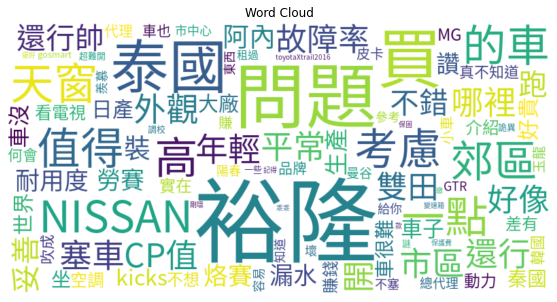

In [303]:
# 可視化
# Word Cloud

font = '/Users/isc_admin/Desktop/網頁爬蟲/SourceHanSansTW-Regular.otf'
wordcloud = WordCloud(font_path=font,width=800, height=400, background_color='white').generate(token_comment[5])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [ ]:
reference

1. 分詞字典 https://github.com/fxsjy/jieba/blob/master/extra_dict/dict.txt.big
2. 停用詞 https://github.com/NickYuu/Machine-Learning-1/tree/master/data
3. 中文文字雲 https://github.com/victorgau/wordcloud/blob/master/SourceHanSansTW-Regular.otf
    

In [80]:


# 詞幹提取（Stemming）或詞形還原（Lemmatization）
def stemming(text):
    stemmer = PorterStemmer()
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['標題'] = df['標題'].apply(stemming)
df['文章內容'] = df['文章內容'].apply(stemming)
df['評論'] = df['評論'].apply(stemming)

# 顯示處理後的數據
print(df)

這是一個,示範句子。


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isc_admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
def preprocess_text(text):
    # 移除 HTML 標籤和特殊字符
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def analyze_sentiment(text):
    # 在這裡實現你的輿情分析邏輯，這裡只是一個簡單的示例
    # 返回正面、負面或中性情感
    # 你可以使用情感詞典或機器學習模型進行更高級的分析
    return "Positive" if "好" in text else "Negative" if "壞" in text else "Neutral"

def text_analysis(title, content, comments):
    # 合併文章標題、內容和評論
    full_text = f"{title} {content} {' '.join([' '.join(comment) for comment in comments])}"

    # 文本前處理
    full_text = preprocess_text(full_text)

    # 使用 ArticutAPI 進行中文文本分析
    articut = Articut()
    result = articut.parse(full_text, userDefinedDictFILE="./path/to/your/user_defined_dict.json")

    # 取得斷詞結果
    segmented_text = result['result_segmentation']

    # 移除停用詞
    stopwords = set(['的', '了', '是', '我', '你', '他', '她', '它', '我們', '你們', '他們', '她們', '它們'])
    filtered_text = [word for word in segmented_text if word not in stopwords]

    # 進行詞幹提取或詞形還原，這裡使用詞形還原
    lemmatized_text = articut.getLemma(filtered_text)

    # 輿情分析，這裡只是一個示例
    sentiment = analyze_sentiment(lemmatized_text)

    return {
        'Title': title,
        'Content': content,
        'Comments': comments,
        'Sentiment': sentiment
    }

# 讀取 CSV 文件
data = {
    '標題': ["Toyota新車上市", "BMW售後服務評價"],
    '文章內容': ["最新的Toyota車款已經上市，大家覺得如何？", "最近我去了BMW售後服務中心，感覺不錯。"],
    '評論': [
        ["keikochen: 他\nsjerrysss: 遲早被Mazda取代\nouisxxiii: Mazda? 要確定欸"],
        ["keikon: 有嗎\nsjesss: 無言\niii: 要確定欸"]
    ]
}

df = pd.DataFrame(data)

# 進行文本分析
results = []
for index, row in df.iterrows():
    result = text_analysis(row['標題'], row['文章內容'], row['評論'])
    results.append(result)

# 將結果轉換為 DataFrame
result_df = pd.DataFrame(results)

# 顯示最終的分析結果
print(result_df)

User Defined File Loading Error.
[Errno 2] No such file or directory: './path/to/your/user_defined_dict.json'


KeyError: 'result_segmentation'